In [68]:
%%capture
%pip install scipy numpy pandas matplotlib seaborn

# Atividade 1
No arquivo “Atividade 1.mat”1 da Aula 06 (ver Moodle) você encontrará uma matriz
“dados” com 4 linhas e 200 colunas. Cada linha corresponde a uma medida de velocidade
de condução nervosa (em m/s) que foi coletada em um grupo de 200 indivíduos saudáveis.
Reduções significativas nessas velocidades de condução podem estar associadas a
diferentes condições patológicas, como doenças desmielinizantes, neurodegenerativas ou
como a síndrome do túnel do carpo. Esta condição consiste no estreitamento da região do
pulso por onde passa o nervo mediano (ver figura abaixo). Um dos testes diagnósticos
realizados envolve justamente comparar a condução nervosa dos pacientes com os dados
obtidos em indivíduos saudáveis em um exame de eletroneurografia. Conduções nervosas
em indivíduos saudáveis observam distribuições aproximadamente gaussianas e a
comparação de medidas registradas em pacientes com estas distribuições obtidas em
saudáveis podem levar ao diagnóstico da Síndrome.

In [69]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file = scipy.io.loadmat('../data/pratica_1/Atividade 1.mat')

## Questão A

In [12]:
dados = file.get('dados')

In [54]:
df = pd.DataFrame(
    dados)

In [55]:
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,61.204915,60.001655,58.767884,59.386217,57.042551,62.392690,58.732062,62.618375,59.190475,60.549121,...,61.926205,56.728811,55.690916,62.119866,61.207345,60.358510,55.331676,62.075891,57.263870,55.893088
1,49.028340,50.923110,51.311270,50.548781,49.234431,54.147435,48.755121,50.850568,48.677835,51.135987,...,50.893160,52.844065,50.172873,52.262556,52.955016,51.132810,48.723338,50.327604,47.890556,45.522511
2,55.228063,55.780176,55.365634,54.573325,54.395876,56.650404,55.549939,57.302721,56.167608,57.097771,...,54.216216,56.923456,56.603125,54.498523,51.663645,54.901655,53.241012,53.494101,54.359490,52.811328
3,62.786420,59.941466,58.864239,59.684981,57.154436,62.629718,59.185709,61.665962,60.224763,58.373115,...,57.701332,61.817263,61.676921,59.307393,56.996306,59.531800,62.080196,59.386064,60.233529,59.920333


In [56]:
mean = df.mean(axis=1)
variance = df.var(axis=1)

In [60]:
mean

0    58.710804
1    50.093852
2    54.998854
3    59.906225
dtype: float64

In [61]:
variance

0    5.074304
1    4.436445
2    1.974906
3    2.952060
dtype: float64

## Questão B

In [79]:
p = [df.iloc[0], df.iloc[1], df.iloc[2], df.iloc[3]]

<AxesSubplot: xlabel='0', ylabel='Count'>

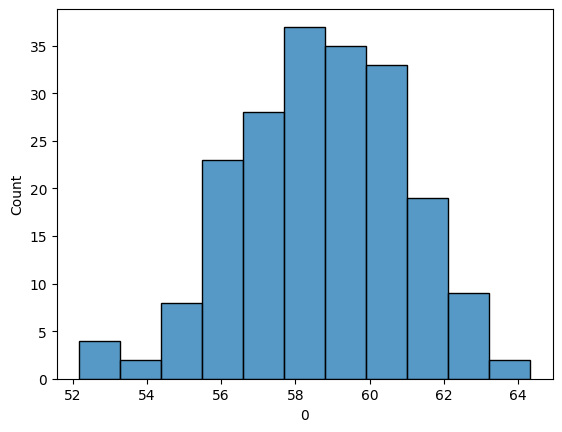

In [82]:
sns.histplot(data=p[0])

In [100]:
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,61.204915,60.001655,58.767884,59.386217,57.042551,62.392690,58.732062,62.618375,59.190475,60.549121,...,61.926205,56.728811,55.690916,62.119866,61.207345,60.358510,55.331676,62.075891,57.263870,55.893088
1,49.028340,50.923110,51.311270,50.548781,49.234431,54.147435,48.755121,50.850568,48.677835,51.135987,...,50.893160,52.844065,50.172873,52.262556,52.955016,51.132810,48.723338,50.327604,47.890556,45.522511
2,55.228063,55.780176,55.365634,54.573325,54.395876,56.650404,55.549939,57.302721,56.167608,57.097771,...,54.216216,56.923456,56.603125,54.498523,51.663645,54.901655,53.241012,53.494101,54.359490,52.811328
3,62.786420,59.941466,58.864239,59.684981,57.154436,62.629718,59.185709,61.665962,60.224763,58.373115,...,57.701332,61.817263,61.676921,59.307393,56.996306,59.531800,62.080196,59.386064,60.233529,59.920333


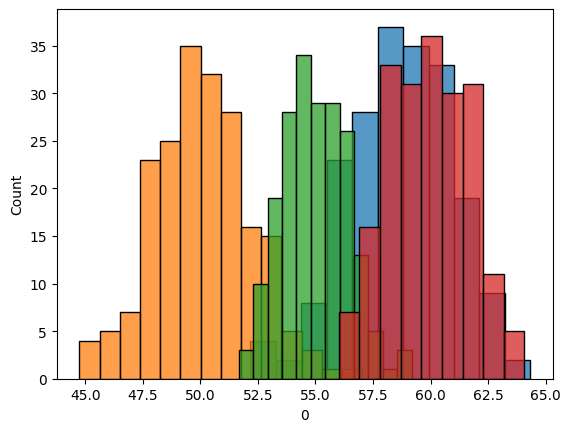

In [102]:
for row in p:
    sns.histplot(data=row, )

In [95]:
shapiro = [
    scipy.stats.shapiro(dado) for dado in dados]

for response in shapiro:
    print(f'stats: {response.statistic} |' + \
        f' pvalue: {response.pvalue}')

stats: 0.9914844036102295 | pvalue: 0.2909250557422638
stats: 0.99591064453125 | pvalue: 0.8722327351570129
stats: 0.9926678538322449 | pvalue: 0.4182417690753937
stats: 0.989329993724823 | pvalue: 0.1423974484205246


O teste e shapiro-Wilk assume que a distribuição dos dados é normal. Os dados retornados pelo teste são:
confiabilidade (stats) e probabilidade de ser normal (p-value). O valor de p é maior que 0.05, logo, os dados podem ser tratados como uma distribuição normal. (Não se deve rejeitar a hipótese nula).

## Questão C

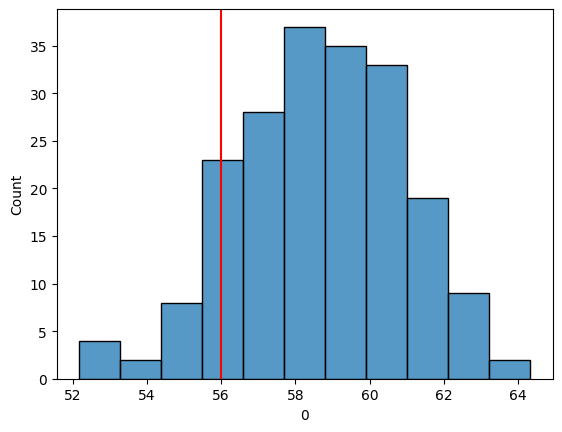

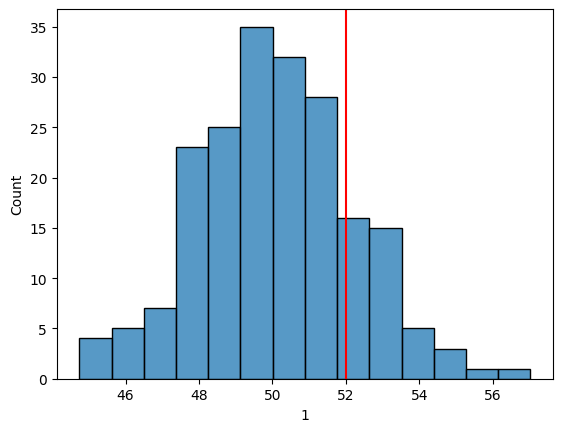

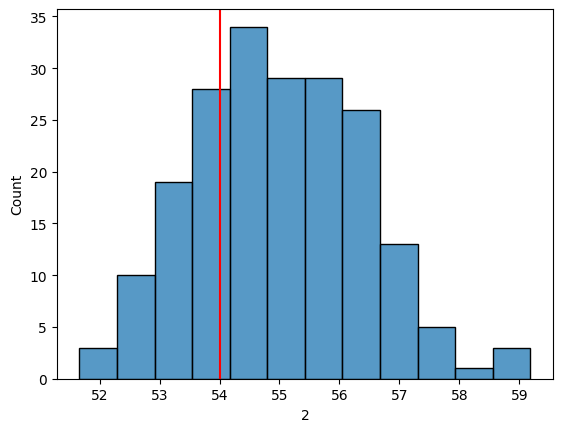

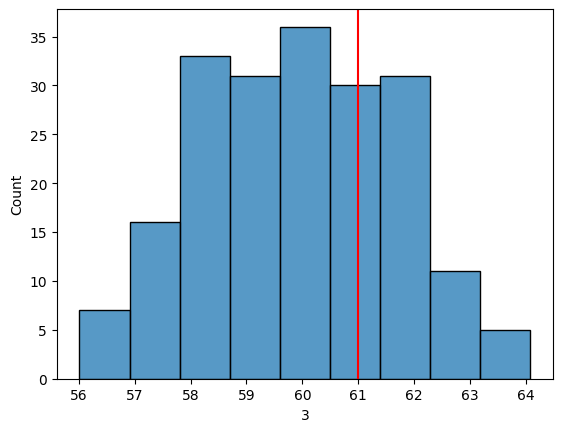

In [107]:
values = [56, 52, 54, 61]
for index, row in enumerate(p):
    plt.figure()
    sns.histplot(data=row )
    plt.axvline(values[index], color='red')


In [109]:
def calcula_distribuicao_normal(df):
    media = df.mean()
    desvio_padrao = df.std()
    return scipy.stats.norm(media, desvio_padrao)


In [110]:
calcula_distribuicao_normal(df.iloc[0])

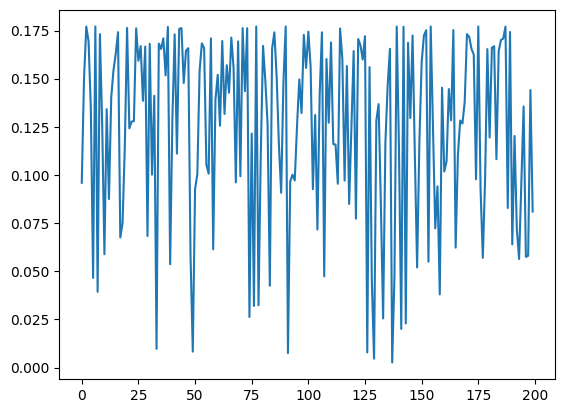

In [111]:
plt.plot(calcula_distribuicao_normal(df.iloc[0]).pdf(df.iloc[0]))